# Двухфазная фильтрация

## Несжимаемая жидкость

### Уравнения

Уравнения неразрывности и движения для двухфазного потока в неупругой пористой среде
$$ \begin{cases}
\frac{\partial S}{\partial t} + \nabla \cdot (S \vec{u}) = 0 \\
\frac{\partial (1 - S)}{\partial t} + \nabla \cdot \left( \left(1 - S \right) \vec{v} \right) = 0 \\
\vec{u} = -\frac{k}{\mu_1} k^*_1(S) \nabla P \\
\vec{v} = -\frac{k}{\mu_2} k^*_2(S) \nabla P \\
\end{cases} $$

где $S$ - насыщенность пористой среды 1-й фазой

$$ \begin{cases}
\frac{\partial S}{\partial t} + \nabla \cdot (S \vec{u}) = 0 \\
\nabla \cdot (S \vec{u}) + \nabla \cdot \left( \left(1 - S \right) \vec{v} \right) = 0 \\
\vec{u} = -\frac{k}{\mu_1} k^*_1(S) \nabla P \\
\vec{v} = -\frac{k}{\mu_2} k^*_2(S) \nabla P \\
\end{cases} $$

Принимая поток одномерным, получим

$$ \begin{cases}
\frac{\partial S}{\partial t} + \frac{\partial S u}{\partial x} = 0 \\
\frac{\partial S u}{\partial x} + \frac{\partial (1 - S) v}{\partial x} = 0 \\
u = -\frac{k}{\mu_1} k^*_1(S) \frac{\partial P}{\partial x} \\
v = -\frac{k}{\mu_2} k^*_2(S) \frac{\partial P}{\partial x} \\
\end{cases} $$

Подставляя уравнения движения в уравнения неразрывности, получим

$$ \begin{cases}
\frac{\partial S}{\partial t} - \frac{k}{\mu_1} \frac{\partial}{\partial x} \left( k^*_1(S) S \frac{\partial P}{\partial x} \right) = 0 \\

\frac{1}{\mu_1} \frac{\partial}{\partial x} \left(k^*_1(S) S \frac{\partial P}{\partial x} \right) + 
\frac{1}{\mu_2} \frac{\partial}{\partial x} \left( (1 - S)  k^*_2(S) \frac{\partial P}{\partial x} \right)
= 0 \\
\end{cases} \Leftrightarrow $$

$$ \Leftrightarrow \begin{cases}
\frac{\partial S}{\partial t} - 
\frac{k}{\mu_1} \left[ k^*_1(S) S \frac{\partial^2 P}{\partial x^2} + 
\frac{\partial P}{\partial x} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) \right] = 0 \\

\frac{1}{\mu_1} \left[ k^*_1(S) S \frac{\partial^2 P}{\partial x^2} + 
\frac{\partial P}{\partial x} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) \right] + 
\frac{1}{\mu_2} \left[ (1 - S) k_2^*(S) \frac{\partial^2 P}{\partial x^2} +
\frac{\partial P}{\partial x} \left( (1 - S) \frac{\partial k_2^*(S)}{\partial x} -
k_2^*(S) \frac{\partial S}{\partial x} \right) \right]
= 0 \\
\end{cases} \Leftrightarrow $$

$$ \Leftrightarrow \begin{cases}
\frac{\partial S}{\partial t} - \frac{k}{\mu_1} \left[
\frac{\partial^2 P}{\partial x^2}  k^*_1(S) S  +
\frac{\partial P}{\partial x} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) \right]  = 0 \\

\frac{\partial^2 P}{\partial x^2} 
    \left[ \frac{k^*_1(S)}{\mu_1}  S  + \frac{k_2^*(S)}{\mu_2}  (1 - S) \right] +
\frac{\partial P}{\partial x} 
    \left[ 
        \frac{1}{\mu_1} \left( S \frac{\partial k^*_1(S) }{\partial x} + k^*_1(S) \frac{\partial S}{\partial x} \right) 
        +
        \frac{1}{\mu_2} \left( (1 - S) \frac{\partial k_2^*(S)}{\partial x} - k_2^*(S) \frac{\partial S}{\partial x} \right) 
    \right]
= 0 \\
\end{cases} $$

Тут можно попробовать расписать в конечных разностях с $\sigma$ и решать итерационно, но я пойду по пути нахождения явным методом $S$ и неявным $P$ с известным полем насыщенности.

### Численное решение

Пусть область изменения аргументов $(x, t)$ есть прямоугольник $\bar{Д} = (0 ≤ x ≤ L, 0 ≤ t ≤ T)$. Построим на отрезке 0 ≤ x ≤ L сетку $\bar{\omega}_h = \{ x_i = ih,\, i=0,1,...,N \}$. Множество узлов $(x_i, t_n)$ с координатами $x_i = ih$ и $t_n = n\tau$ назовем сеткой в прямоугольнике $\bar{Д}$ и обозначим $\bar{\omega}_{h\tau} = \{ (x_i = ih, t_n = n\tau),\, i = 0,1,...,N, \, n = 0,1,...,N_0 \} $

$$
\frac{S_{i}^{n+1} - S_{i}^{n}}{\tau} - 
\frac{k}{h^2 \mu_1} \left[ k^*_1(S^{n}_{i}) S^{n}_{i} (P^{n}_{i-1} - 2  P^{n}_{i} + P^{n}_{i+1})  -
(P^{n}_{i} - P^{n}_{i-1} ) \left( S^{n}_{i} (k^*_1(S_{i}^{n}) - k^*_1(S_{i-1}^{n}) ) + k^*_1(S_{i}^{n}) (S_{i}^{n} - S_{i-1}^{n}) \right) \right]  = 0 \\
$$

$$
S_{i}^{n+1} = S_{i}^{n} + 
\frac{k \tau}{\mu_1 h^2 } \left[ k^*_1(S^{n}_{i}) S^{n}_{i} \{ P^{n}_{i-1} - 2  P^{n}_{i} + P^{n}_{i+1} \}  -
\{ P^{n}_{i} - P^{n}_{i-1} \} \{ S^{n}_{i} (k^*_1(S_{i}^{n}) - k^*_1(S_{i-1}^{n}) ) + k^*_1(S_{i}^{n}) (S_{i}^{n} - S_{i-1}^{n}) \} \right] \\
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import SLAU

def k1(S):
    return (S - 1)**2

def k2(S):
    return S*S

In [10]:
# Хар-ки породы
k = 0.5 * 10**(-12)

# Флюидов
mu1 = 2 * 10**(-3)
mu2 = 3 * 10**(-3)

# Длина расчетной области
L = 1
T = 0.01

# Кол-во узловых точек
N = 10
N0 = 15

# Граничные условия (начало и конец расчетной области)
P0 = 2 * 10**6
Pn = 1 * 10**6
S0 = 1
Sn = 0.2

In [11]:
P = np.zeros([N0, N])
P[0, :] = Pn
P[:, 0] = P0
P[:, -1] = Pn

S = np.zeros([N0, N])
S[0, :] = Sn
S[:, 0] = S0
S[:, -1] = Sn

tau = T / (N0 - 1)
h = L / (N - 1)

P

array([[2000000., 1000000., 1000000., 1000000., 1000000., 1000000.,
        1000000., 1000000., 1000000., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1000000.],
       [2000000.,       0.,       0.,       0.,       0.,       

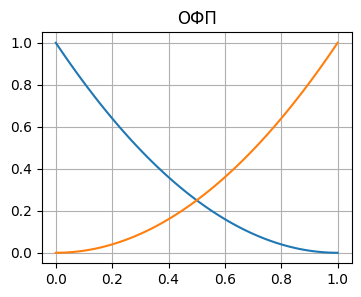

In [12]:
# визуал ОФП
figure(figsize=(4, 3), dpi=100)
s = np.arange(0, 1.01, 0.01)
plt.plot(s, [k1(i) for i in s], s, [k2(i) for i in s])
plt.title("ОФП")
plt.grid(True)
plt.show()

In [13]:
temp = k * tau / mu1 / h**2

for n in range(1, N0):
    a = np.zeros(N-3)
    b = np.zeros(N-3)
    c = np.zeros(N-2)
    f = np.zeros(N-2)
    for i in range(1, N-1):
        S[n, i] = S[n-1, i] + temp * \
            (k1(S[n-1, i]) * S[n-1, i] * (P[n-1, i-1] - 2 * P[n-1, i] + P[n-1, i+1]) - \
            (P[n-1, i] - P[n-1, i-1]) * (S[n-1, i] * (k1(S[n-1, i] - k1(S[n-1, i-1])) + k1(S[n-1, i]) * (S[n-1, i] - S[n-1, i-1]))))
        # print("dS =", temp * (k1(S[n-1, i]) * S[n-1, i] * (P[n-1, i-1] - 2 * P[n-1, i] + P[n-1, i+1]) - \
            # (P[n-1, i] - P[n-1, i-1]) * (S[n-1, i] * (k1(S[n-1, i] - k1(S[n-1, i-1])) + k1(S[n-1, i]) * (S[n-1, i] - S[n-1, i-1])))))
        
        skbka1 = S[n, i] * k1(S[n, i]) / mu1 + (1 - S[n, i]) * k2(S[n, i]) / mu2
        skbka2 = 1 / mu1 * (S[n, i] * k1(S[n, i]) - S[n, i-1] * k1(S[n, i-1])) + 1 / mu2 * ((1 - S[n,i]) * k2(S[n, i]) - (1 - S[n, i-1]) * k2(S[n, i-1]))
        
        c[i-1] = 2 * skbka1 + skbka2

        if i < N - 2:
            b[i-1] = skbka1 + skbka2

        if i > 1:
            a[i-2] = skbka1
        
        if i == 1:
            f[i - 1] = skbka1 * P[n, i-1]
        elif i == N-2:
            f[-1] = (2 * skbka1 + skbka2) * P[n, -1]

    # print(a, b, c, f)
    p = SLAU.tridiagonal_solve(a, b, c, f)
    P[n, 1:-1] = p
    # print(p)


NameError: name 'quit' is not defined

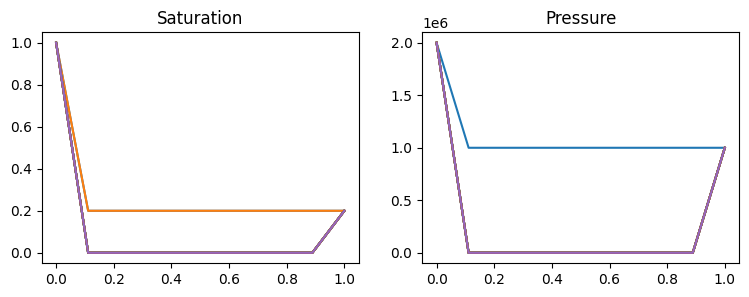

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), sharey=False)
ax1.set_title("Saturation")
ax2.set_title("Pressure")

for i in S:
    ax1.plot(np.arange(0, L+h/2, h), i)
    
for i in P:
    ax2.plot(np.arange(0, L+h/2, h), i)

plt.show()